In [1]:
import pandas as pd

In [19]:
file = "docker_stats.csv"
df = pd.read_csv(file)
df.head(10)
df = df[:-1]


In [23]:
file = "monitoring.csv"
df2 = pd.read_csv(file)
df2 = df2[:-1]

df2.head(10)

,Name,CPU %,Memory Usage,Memory %,Network I/O,Block I/O,PIDs
0,[2J[Hpropertytrackpro-prop-pulse-nginx-1,0.00%,4.426MiB / 1GiB,0.43%,830B / 0B,0B / 8.19kB,5.0
1,propertytrackpro-prop-pulse-ui-1,0.01%,366.3MiB / 1GiB,35.77%,830B / 0B,0B / 10.2MB,35.0
2,propertytrackpro-prop-pulse-backend-2,0.01%,74.7MiB / 1GiB,7.29%,8.52kB / 10.8kB,0B / 15.1MB,6.0
3,propertytrackpro-prop-pulse-backend-1,0.01%,74.71MiB / 1GiB,7.30%,8.52kB / 10.8kB,0B / 15.1MB,6.0
4,propertytrackpro-prop-pulse-postgres-1,0.00%,26.33MiB / 512MiB,5.14%,22.7kB / 15.4kB,0B / 221kB,10.0
5,tracker,0.00%,70.86MiB / 2.901GiB,2.38%,1.1MB / 1.07MB,42.6MB / 3.35MB,8.0
6,[2J[Hpropertytrackpro-prop-pulse-nginx-1,0.00%,4.426MiB / 1GiB,0.43%,830B / 0B,0B / 8.19kB,5.0
7,propertytrackpro-prop-pulse-ui-1,0.01%,366.3MiB / 1GiB,35.77%,830B / 0B,0B / 10.2MB,35.0
8,propertytrackpro-prop-pulse-backend-2,0.01%,74.7MiB / 1GiB,7.29%,8.52kB / 10.8kB,0B / 15.1MB,6.0
9,propertytrackpro-prop-pulse-backend-1,0.01%,74.71MiB / 1GiB,7.30%,8.52kB / 10.8kB,0B / 15.1MB,6.0


In [26]:
    # Clean the data before pivoting
    # 1. Clean container names by removing ANSI escape sequences
def cleanup_logs(df):
    import re
    df['Name'] = df['Name'].apply(lambda x: re.sub(r'\x1b\[\d+[JH]', '', x))

    # 2. Extract numeric values from percentage strings
    df['CPU'] = df['CPU %'].str.rstrip('%').astype(float)
    df['Memory'] = df['Memory %'].str.rstrip('%').astype(float)

    # 3. Parse Network I/O and Block I/O into numeric columns
    # For Network I/O: Extract received and transmitted values
    def parse_network_io(value):
        if pd.isna(value):
            return pd.NA
        parts = value.split('/')
        if len(parts) == 2:
            return parts[0].strip(), parts[1].strip()
        return pd.NA, pd.NA

    df[['Network Received', 'Network Transmitted']] = df['Network I/O'].apply(
        lambda x: pd.Series(parse_network_io(x))
    )

    # For Block I/O: Extract read and write values
    def parse_block_io(value):
        if pd.isna(value):
            return pd.NA
        parts = value.split('/')
        if len(parts) == 2:
            return parts[0].strip(), parts[1].strip()
        return pd.NA, pd.NA

    df[['Block Read', 'Block Write']] = df['Block I/O'].apply(
        lambda x: pd.Series(parse_block_io(x))
    )

    # 4. Create a unique time index for each container's data point
    df['TimeIndex'] = df.groupby('Name').cumcount()
    return df[["TimeIndex", "Name", "CPU", "Memory", "Network Received","Network Transmitted", "Block Read", "Block Write", "PIDs"]]

In [42]:
preprocessed_df = cleanup_logs(df2)

In [49]:
preprocessed_df.head(10)

,TimeIndex,Name,CPU,Memory,Network Received,Network Transmitted,Block Read,Block Write,PIDs
0,0,[Hpropertytrackpro-prop-pulse-nginx-1,0.00,0.43,830B,0B,0B,8.19kB,5.0
1,0,propertytrackpro-prop-pulse-ui-1,0.01,35.77,830B,0B,0B,10.2MB,35.0
2,0,propertytrackpro-prop-pulse-backend-2,0.01,7.29,8.52kB,10.8kB,0B,15.1MB,6.0
3,0,propertytrackpro-prop-pulse-backend-1,0.01,7.30,8.52kB,10.8kB,0B,15.1MB,6.0
4,0,propertytrackpro-prop-pulse-postgres-1,0.00,5.14,22.7kB,15.4kB,0B,221kB,10.0
5,0,tracker,0.00,2.38,1.1MB,1.07MB,42.6MB,3.35MB,8.0
6,1,[Hpropertytrackpro-prop-pulse-nginx-1,0.00,0.43,830B,0B,0B,8.19kB,5.0
7,1,propertytrackpro-prop-pulse-ui-1,0.01,35.77,830B,0B,0B,10.2MB,35.0
8,1,propertytrackpro-prop-pulse-backend-2,0.01,7.29,8.52kB,10.8kB,0B,15.1MB,6.0
9,1,propertytrackpro-prop-pulse-backend-1,0.01,7.30,8.52kB,10.8kB,0B,15.1MB,6.0


In [9]:
# Clean the data before pivoting
# 1. Clean container names by removing ANSI escape sequences
import re
copy_df['Name'] = copy_df['Name'].apply(lambda x: re.sub(r'\x1b\[\d+[JH]', '', x))

# 2. Extract numeric values from percentage strings
copy_df['CPU'] = copy_df['CPU %'].str.rstrip('%').astype(float)
copy_df['Memory'] = copy_df['Memory %'].str.rstrip('%').astype(float)

# 3. Parse Network I/O and Block I/O into numeric columns
# For Network I/O: Extract received and transmitted values
def parse_network_io(value):
    if pd.isna(value):
        return pd.NA
    parts = value.split('/')
    if len(parts) == 2:
        return parts[0].strip(), parts[1].strip()
    return pd.NA, pd.NA

copy_df[['Network Received', 'Network Transmitted']] = copy_df['Network I/O'].apply(
    lambda x: pd.Series(parse_network_io(x))
)

# For Block I/O: Extract read and write values
def parse_block_io(value):
    if pd.isna(value):
        return pd.NA
    parts = value.split('/')
    if len(parts) == 2:
        return parts[0].strip(), parts[1].strip()
    return pd.NA, pd.NA

copy_df[['Block Read', 'Block Write']] = copy_df['Block I/O'].apply(
    lambda x: pd.Series(parse_block_io(x))
)

# 4. Create a unique time index for each container's data point
copy_df['TimeIndex'] = copy_df.groupby('Name').cumcount()


In [10]:
# Create a pivot table with Name as columns, TimeIndex as rows
pivoted_df = copy_df.pivot_table(
    index='TimeIndex', 
    columns='Name', 
    values=['CPU', 'Memory', 'CPU %', 'Memory %', 'Network I/O', 'Block I/O', 'PIDs']
)

TypeError: agg function failed [how->mean,dtype->object]

/var/folders/bg/h849yg0s2771n7mypkp93k680000gn/T/ipykernel_27514/1708814037.py:62: UserWarning: Glyph 27 () missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adit/Machine Learing and AI Apps/PropertyTrackPro/server/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


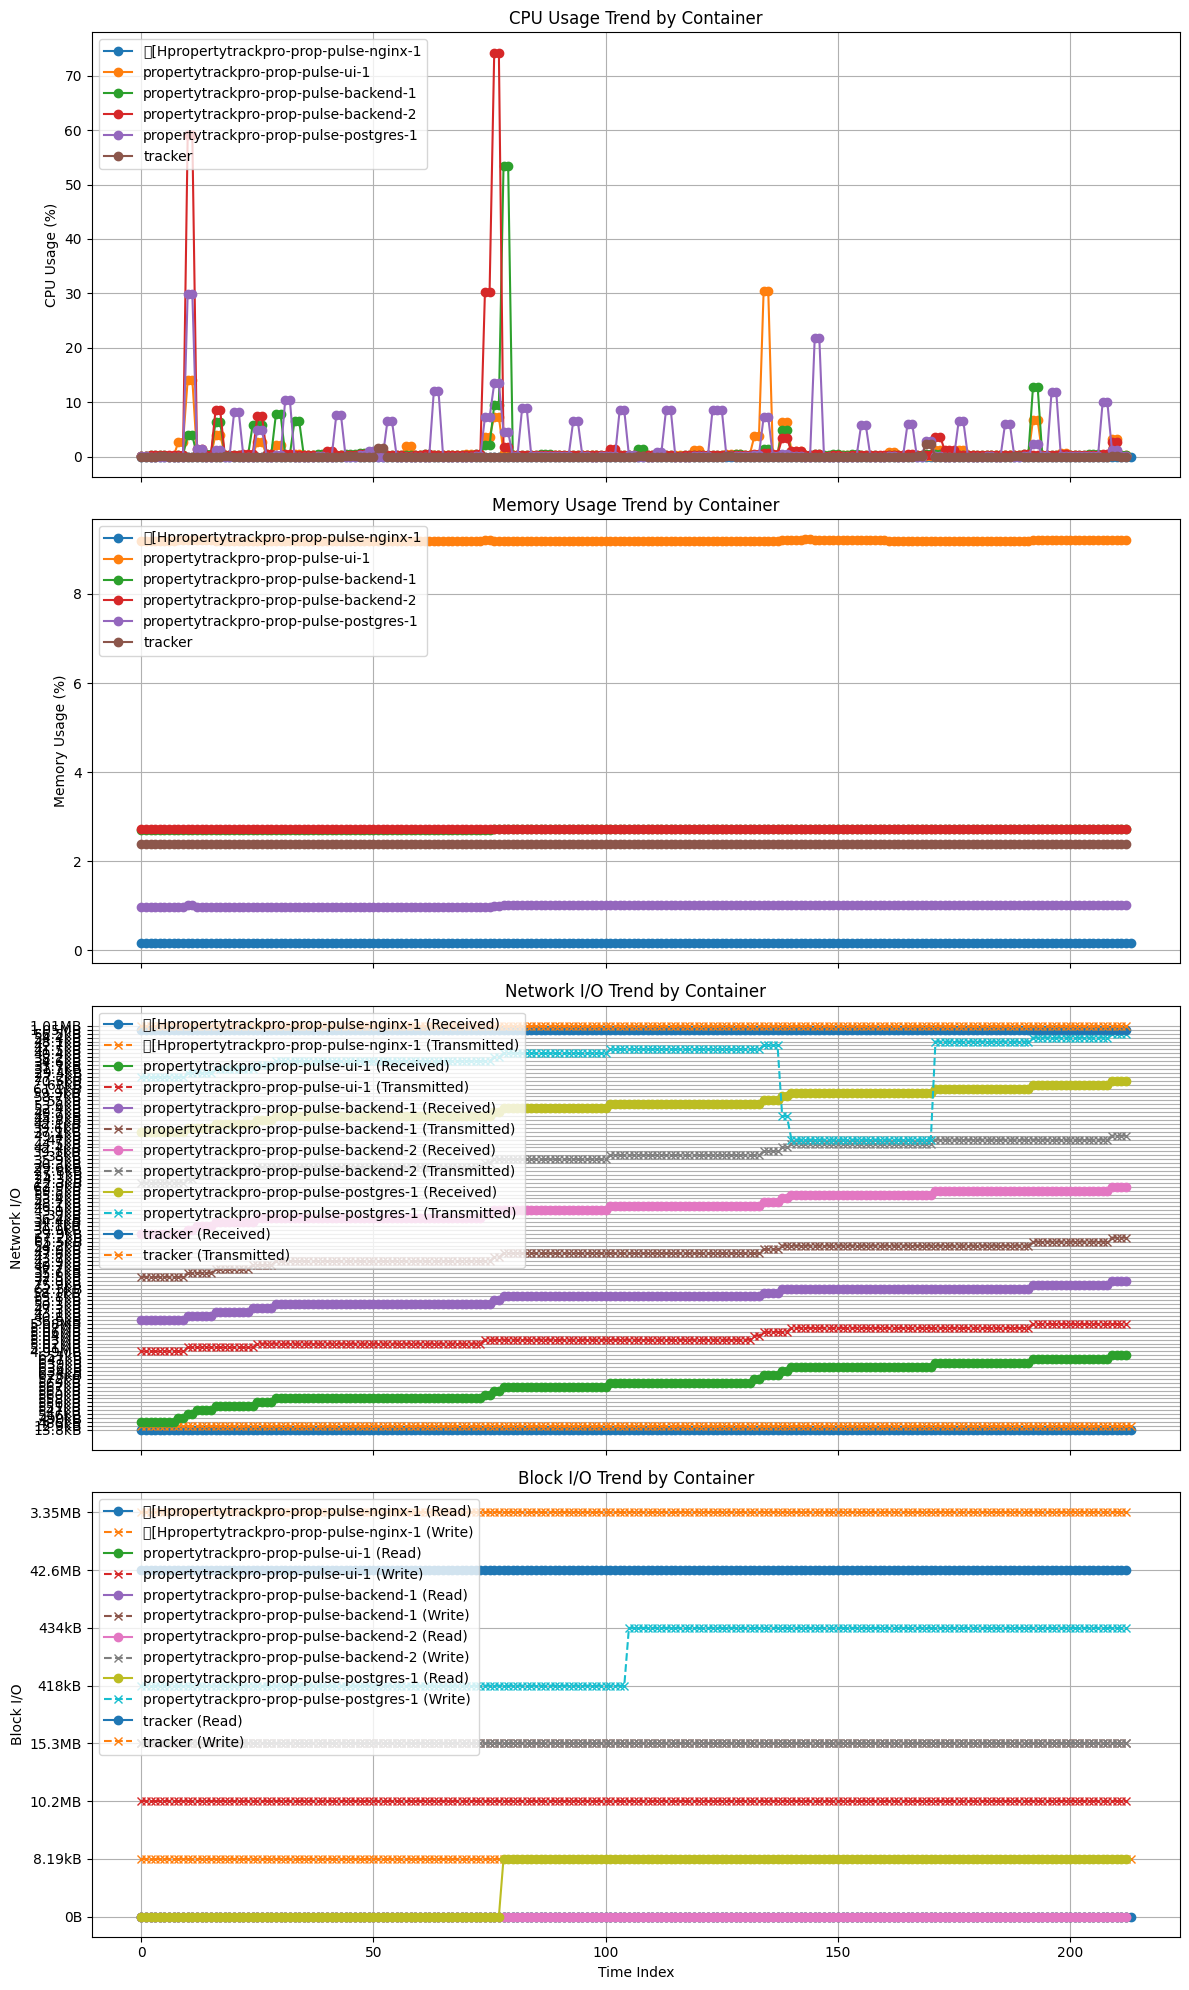

In [22]:
import matplotlib.pyplot as plt
import re


# Set up the plot with 4 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 20), sharex=True)

# Plot CPU usage for each container
for name in df['Name'].unique():
    container_data = df[df['Name'] == name]
    ax1.plot(container_data['TimeIndex'], container_data['CPU'], marker='o', label=name)

ax1.set_title('CPU Usage Trend by Container')
ax1.set_ylabel('CPU Usage (%)')
ax1.grid(True)
ax1.legend(loc='upper left')

# Plot Memory usage for each container
for name in df['Name'].unique():
    container_data = df[df['Name'] == name]
    ax2.plot(container_data['TimeIndex'], container_data['Memory'], marker='o', label=name)

ax2.set_title('Memory Usage Trend by Container')
ax2.set_ylabel('Memory Usage (%)')
ax2.grid(True)
ax2.legend(loc='upper left')

# Plot Network I/O for each container
for name in df['Name'].unique():
    container_data = df[df['Name'] == name]
    ax3.plot(container_data['TimeIndex'], container_data['Network Received'], marker='o', linestyle='-', label=f"{name} (Received)")
    ax3.plot(container_data['TimeIndex'], container_data['Network Transmitted'], marker='x', linestyle='--', label=f"{name} (Transmitted)")

ax3.set_title('Network I/O Trend by Container')
ax3.set_ylabel('Network I/O')
ax3.grid(True)
ax3.legend(loc='upper left')

# Plot Block I/O for each container
for name in df['Name'].unique():
    container_data = df[df['Name'] == name]
    ax4.plot(container_data['TimeIndex'], container_data['Block Read'], marker='o', linestyle='-', label=f"{name} (Read)")
    ax4.plot(container_data['TimeIndex'], container_data['Block Write'], marker='x', linestyle='--', label=f"{name} (Write)")

ax4.set_title('Block I/O Trend by Container')
ax4.set_xlabel('Time Index')
ax4.set_ylabel('Block I/O')
ax4.grid(True)
ax4.legend(loc='upper left')

plt.tight_layout()
plt.show()


/var/folders/bg/h849yg0s2771n7mypkp93k680000gn/T/ipykernel_27514/2497225198.py:51: UserWarning: Glyph 27 () missing from font(s) DejaVu Sans.
  plt.tight_layout()


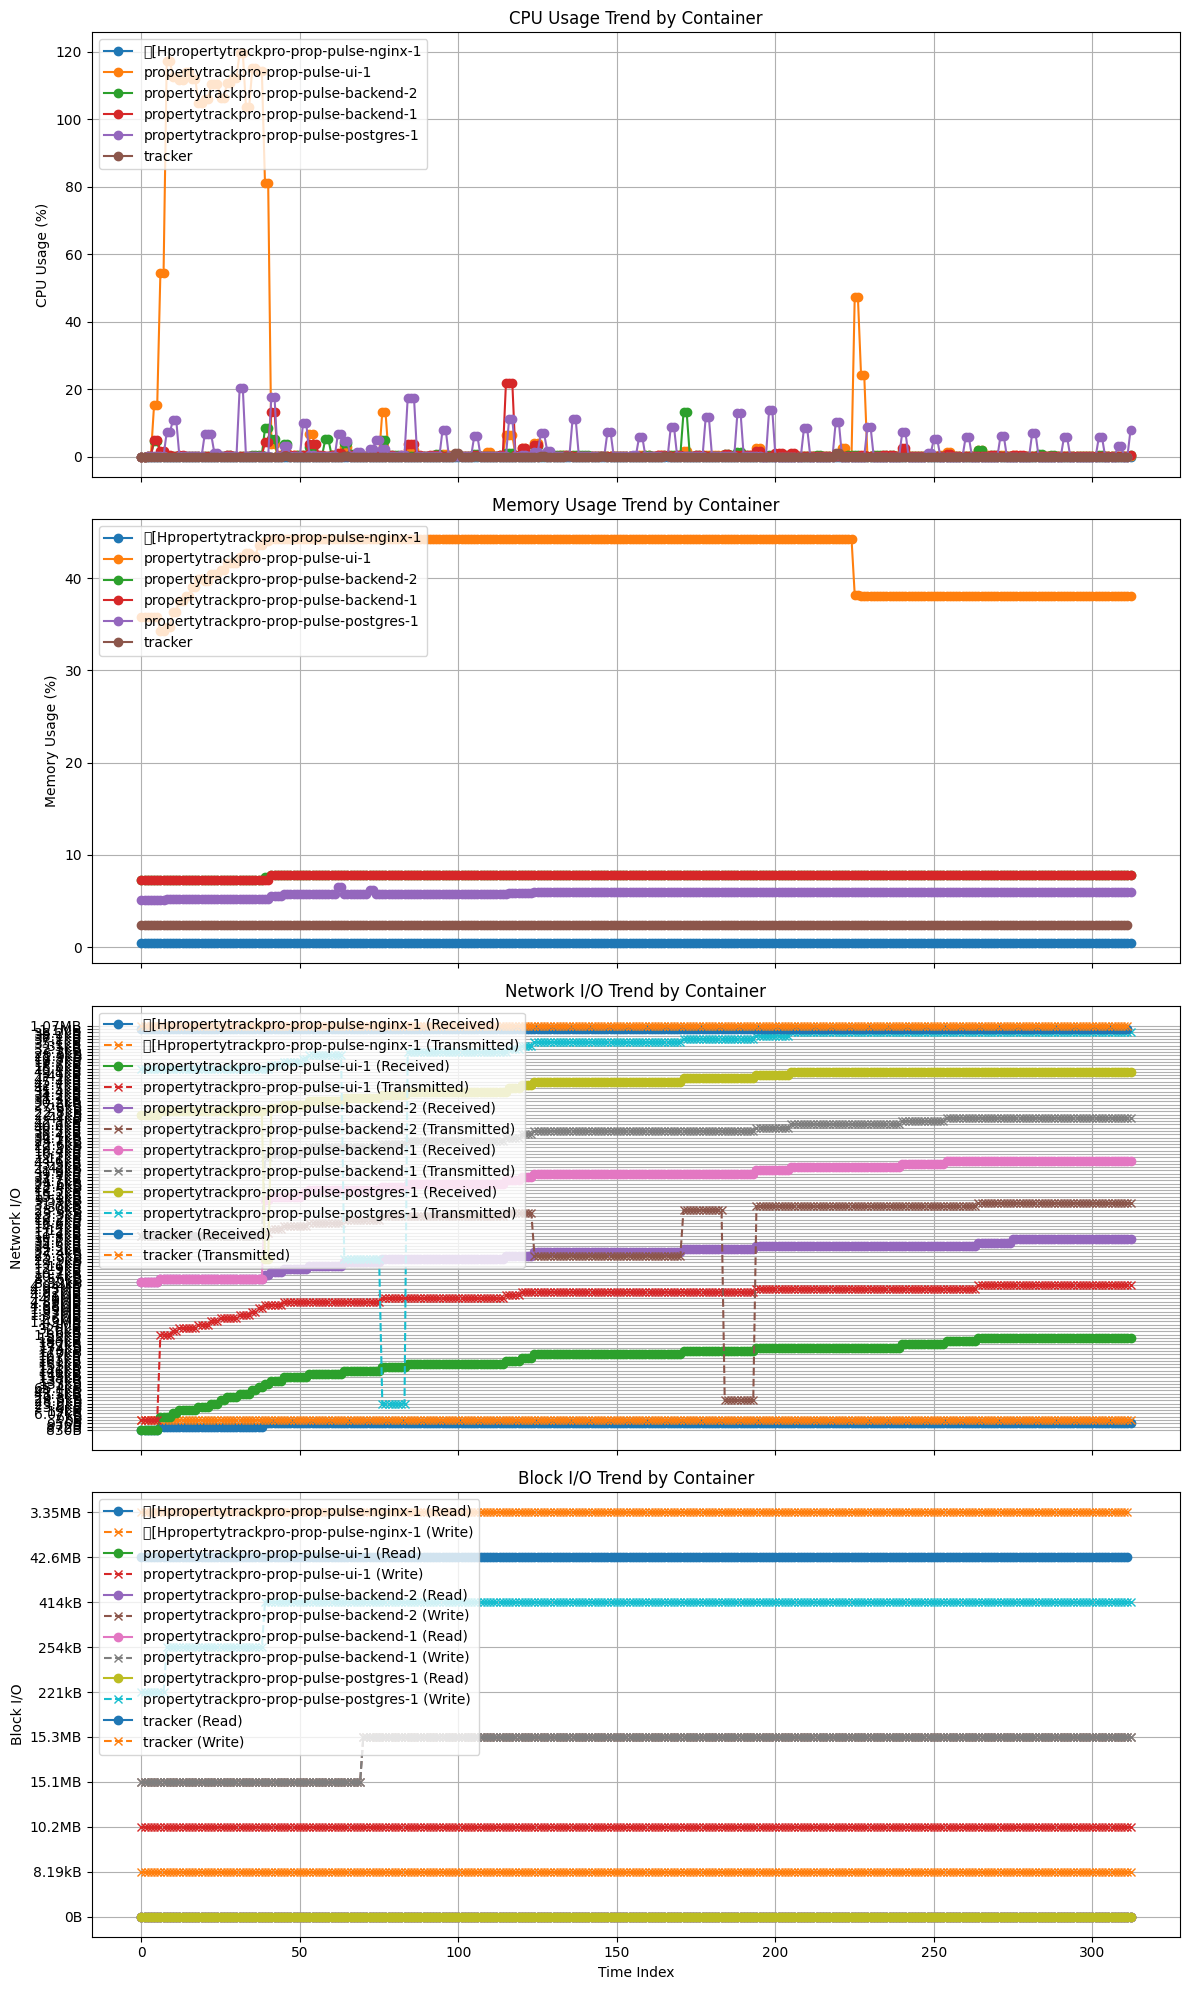

In [32]:
import matplotlib.pyplot as plt
import re


# Set up the plot with 4 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 20), sharex=True)

# Plot CPU usage for each container
for name in preprocessed_df['Name'].unique():
    container_data = preprocessed_df[preprocessed_df['Name'] == name]
    ax1.plot(container_data['TimeIndex'], container_data['CPU'], marker='o', label=name)

ax1.set_title('CPU Usage Trend by Container')
ax1.set_ylabel('CPU Usage (%)')
ax1.grid(True)
ax1.legend(loc='upper left')

# Plot Memory usage for each container
for name in preprocessed_df['Name'].unique():
    container_data = preprocessed_df[preprocessed_df['Name'] == name]
    ax2.plot(container_data['TimeIndex'], container_data['Memory'], marker='o', label=name)

ax2.set_title('Memory Usage Trend by Container')
ax2.set_ylabel('Memory Usage (%)')
ax2.grid(True)
ax2.legend(loc='upper left')

# Plot Network I/O for each container
for name in preprocessed_df['Name'].unique():
    container_data = preprocessed_df[preprocessed_df['Name'] == name]
    ax3.plot(container_data['TimeIndex'], container_data['Network Received'], marker='o', linestyle='-', label=f"{name} (Received)")
    ax3.plot(container_data['TimeIndex'], container_data['Network Transmitted'], marker='x', linestyle='--', label=f"{name} (Transmitted)")

ax3.set_title('Network I/O Trend by Container')
ax3.set_ylabel('Network I/O')
ax3.grid(True)
ax3.legend(loc='upper left')

# Plot Block I/O for each container
for name in preprocessed_df['Name'].unique():
    container_data = preprocessed_df[preprocessed_df['Name'] == name]
    ax4.plot(container_data['TimeIndex'], container_data['Block Read'], marker='o', linestyle='-', label=f"{name} (Read)")
    ax4.plot(container_data['TimeIndex'], container_data['Block Write'], marker='x', linestyle='--', label=f"{name} (Write)")

ax4.set_title('Block I/O Trend by Container')
ax4.set_xlabel('Time Index')
ax4.set_ylabel('Block I/O')
ax4.grid(True)
ax4.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [44]:

ui_df = preprocessed_df[preprocessed_df['Name']=='propertytrackpro-prop-pulse-ui-1']
backend_1_df = preprocessed_df[preprocessed_df['Name']=='propertytrackpro-prop-pulse-backend-1']
backend_2_df = preprocessed_df[preprocessed_df['Name']=='propertytrackpro-prop-pulse-backend-2']
postgres_df = preprocessed_df[preprocessed_df['Name']=='propertytrackpro-prop-pulse-postgres-1']

# ui_df.head()
# ui_df.tail()
# ui_df.describe()
# ui_df.info()
# ui_df.shape


Correlation Matrix between Metrics:
           TimeIndex       CPU    Memory  PIDs
TimeIndex   1.000000 -0.515668 -0.373635   NaN
CPU        -0.515668  1.000000 -0.220907   NaN
Memory     -0.373635 -0.220907  1.000000   NaN
PIDs             NaN       NaN       NaN   NaN


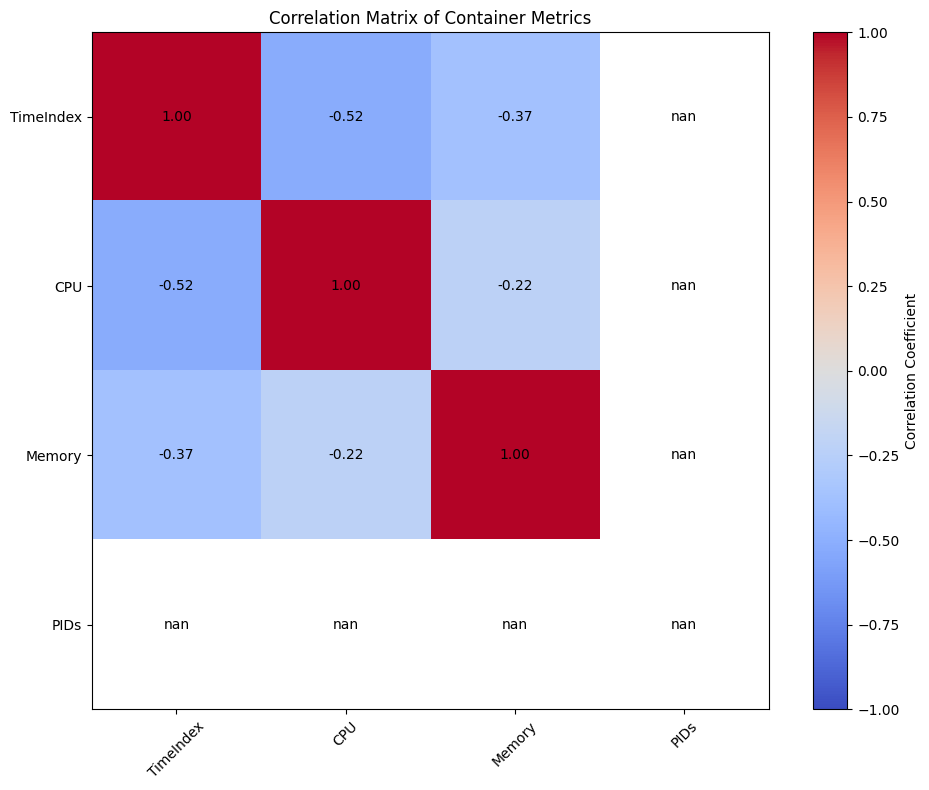

In [45]:
# Calculate correlation matrix for numerical columns
correlation_matrix = ui_df.select_dtypes(include=['float64', 'int64']).corr()

# Display the correlation matrix
print("Correlation Matrix between Metrics:")
print(correlation_matrix)

# Visualize the correlation matrix with matplotlib
plt.figure(figsize=(10, 8))
im = plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation Coefficient')

# Add correlation values as text annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black")

# Set labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix of Container Metrics')
plt.tight_layout()
plt.show()

# # Look at specific correlations of interest
# print("\nCorrelation between CPU and Memory usage:")
# print(correlation_matrix.loc['CPU', 'Memory'])

# print("\nCorrelation between Network activity and CPU usage:")
# print(correlation_matrix.loc[['Network Received', 'Network Transmitted'], 'CPU'])

# print("\nCorrelation between Block I/O and Memory usage:")
# print(correlation_matrix.loc[['Block Read', 'Block Write'], 'Memory'])

Correlation Matrix between Metrics:
           TimeIndex       CPU    Memory      PIDs
TimeIndex   1.000000 -0.147126  0.607662  0.154109
CPU        -0.147126  1.000000  0.007564  0.063937
Memory      0.607662  0.007564  1.000000  0.761597
PIDs        0.154109  0.063937  0.761597  1.000000


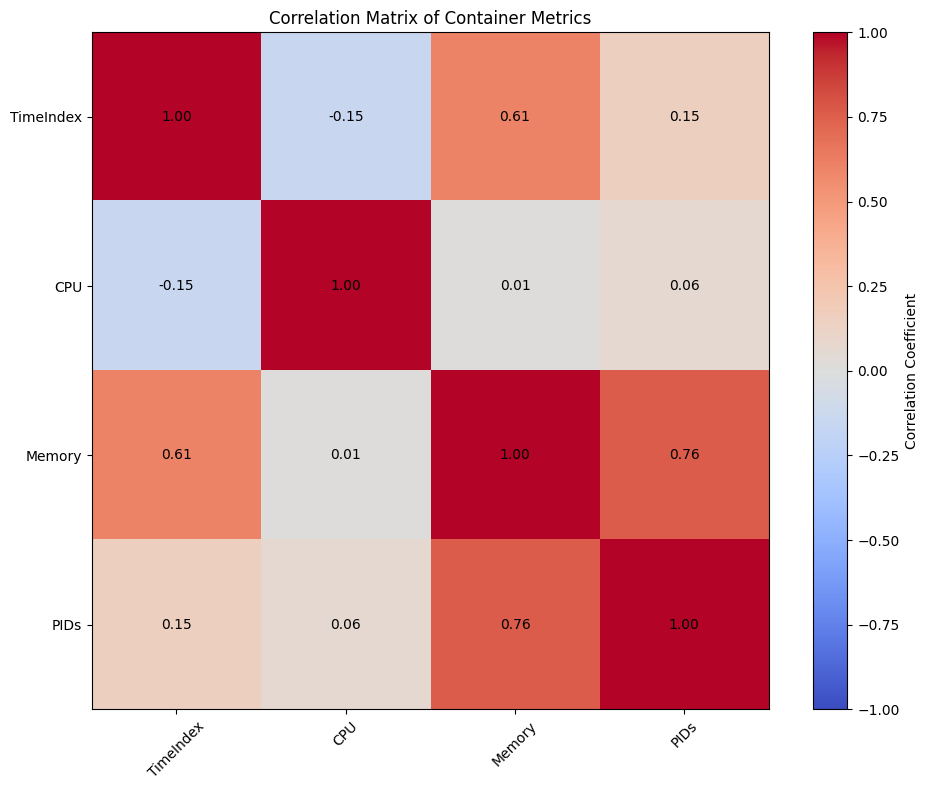

In [46]:
# Calculate correlation matrix for numerical columns
correlation_matrix = backend_1_df.select_dtypes(include=['float64', 'int64']).corr()

# Display the correlation matrix
print("Correlation Matrix between Metrics:")
print(correlation_matrix)

# Visualize the correlation matrix with matplotlib
plt.figure(figsize=(10, 8))
im = plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation Coefficient')

# Add correlation values as text annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black")

# Set labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix of Container Metrics')
plt.tight_layout()
plt.show()


In [50]:
preprocessed_df

,TimeIndex,Name,CPU,Memory,Network Received,Network Transmitted,Block Read,Block Write,PIDs
0,0,[Hpropertytrackpro-prop-pulse-nginx-1,0.00,0.43,830B,0B,0B,8.19kB,5.0
1,0,propertytrackpro-prop-pulse-ui-1,0.01,35.77,830B,0B,0B,10.2MB,35.0
2,0,propertytrackpro-prop-pulse-backend-2,0.01,7.29,8.52kB,10.8kB,0B,15.1MB,6.0
3,0,propertytrackpro-prop-pulse-backend-1,0.01,7.30,8.52kB,10.8kB,0B,15.1MB,6.0
4,0,propertytrackpro-prop-pulse-postgres-1,0.00,5.14,22.7kB,15.4kB,0B,221kB,10.0
...,...,...,...,...,...,...,...,...,...
1872,312,[Hpropertytrackpro-prop-pulse-nginx-1,0.00,0.43,956B,0B,0B,8.19kB,5.0
1873,312,propertytrackpro-prop-pulse-ui-1,0.13,38.10,183kB,4.94MB,0B,10.2MB,35.0
1874,312,propertytrackpro-prop-pulse-backend-2,0.33,7.83,35.7kB,31.7kB,0B,15.3MB,7.0
1875,312,propertytrackpro-prop-pulse-backend-1,0.33,7.84,44.6kB,44kB,0B,15.3MB,7.0


Correlation Matrix between Metrics:
           TimeIndex       CPU    Memory      PIDs
TimeIndex   1.000000 -0.184460  0.594517  0.607704
CPU        -0.184460  1.000000 -0.011914 -0.103243
Memory      0.594517 -0.011914  1.000000  0.946212
PIDs        0.607704 -0.103243  0.946212  1.000000


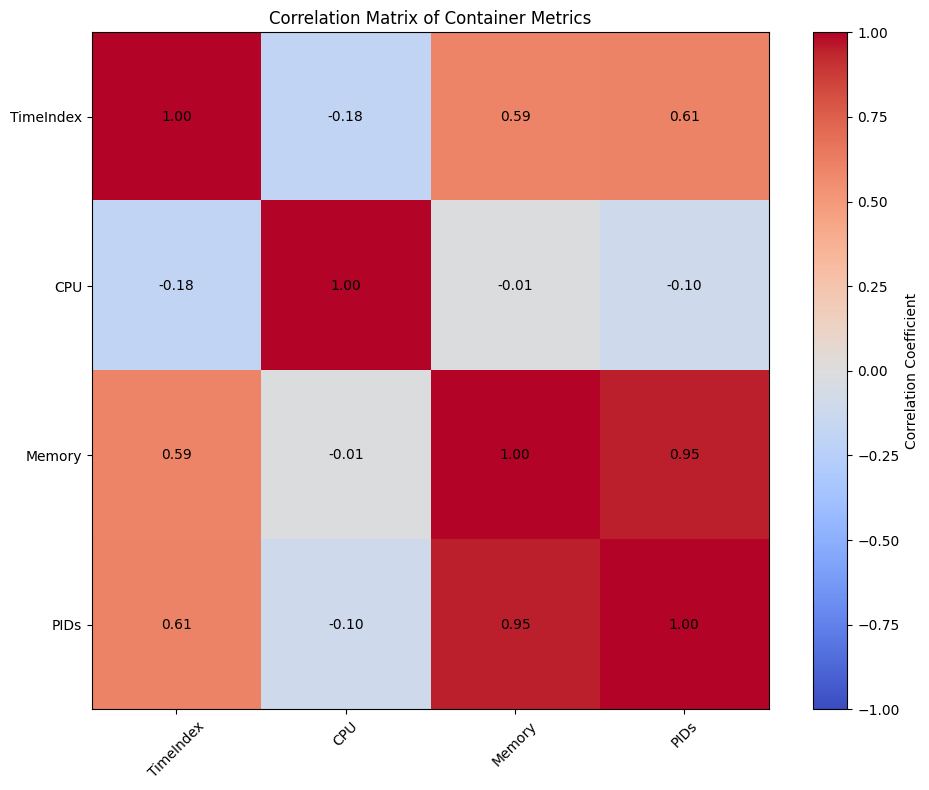

In [47]:
# Calculate correlation matrix for numerical columns
correlation_matrix = backend_2_df.select_dtypes(include=['float64', 'int64']).corr()

# Display the correlation matrix
print("Correlation Matrix between Metrics:")
print(correlation_matrix)

# Visualize the correlation matrix with matplotlib
plt.figure(figsize=(10, 8))
im = plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation Coefficient')

# Add correlation values as text annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black")

# Set labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix of Container Metrics')
plt.tight_layout()
plt.show()


Correlation Matrix between Metrics:
           TimeIndex       CPU    Memory      PIDs
TimeIndex   1.000000 -0.116976  0.715160  0.220751
CPU        -0.116976  1.000000 -0.047546 -0.020102
Memory      0.715160 -0.047546  1.000000  0.569432
PIDs        0.220751 -0.020102  0.569432  1.000000


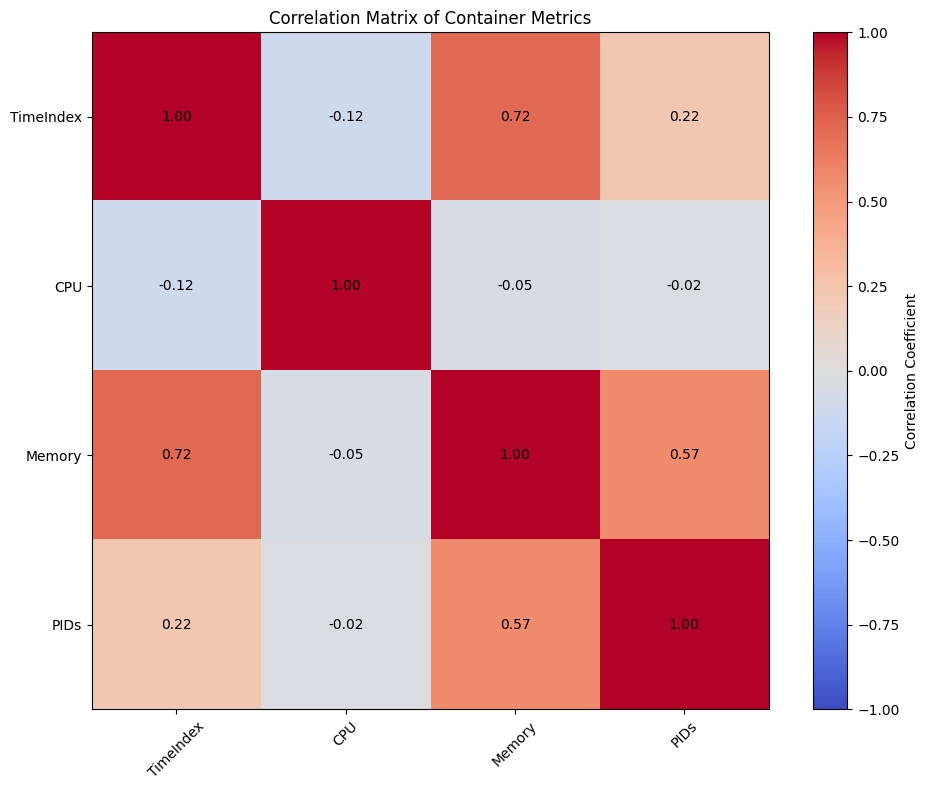

In [48]:
# Calculate correlation matrix for numerical columns
correlation_matrix = postgres_df.select_dtypes(include=['float64', 'int64']).corr()

# Display the correlation matrix
print("Correlation Matrix between Metrics:")
print(correlation_matrix)

# Visualize the correlation matrix with matplotlib
plt.figure(figsize=(10, 8))
im = plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation Coefficient')

# Add correlation values as text annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black")

# Set labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix of Container Metrics')
plt.tight_layout()
plt.show()
